# Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras import models
from keras import layers
from keras.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
from keras import regularizers

# Regression Problem

In [7]:
df = pd.read_csv('./housing.csv', delim_whitespace=True, header=None)
print(df.shape)
df.head()

(506, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### seperating test and train

In [8]:
df = shuffle(df)
train = df[:int(df.shape[0]*.8)]
test = df[int(df.shape[0]*.8):]

In [9]:
train_x = train.to_numpy()[:, :-1]
train_y = train.to_numpy()[:, -1]
test_x = test.to_numpy()[:, :-1]
test_y = test.to_numpy()[:, -1]

### Train Normalization

In [10]:
train_x = (train_x - train_x.mean(0)) / train_x.std(0)
# train_x[:5, :]

### Test Normalization

In [11]:
test_x = (test_x - test_x.mean(0)) / test_x.std(0)
# test_x[:5, :]

## MLP

In [14]:
def create_model():
    model = models.Sequential()
    model.add(layers.Dense(256, activation='relu', input_shape=(13,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mean_absolute_error'])
    return model

In [15]:
folds = KFold(n_splits=5, random_state=None)
mae = []
 
for id, idv in folds.split(train_x):
  model = create_model()
  xk_train, xk_valid = train_x[id,:], train_x[idv,:]
  yk_train, yk_valid = train_y[id], train_y[idv]

  model.fit(xk_train, yk_train, epochs=5, batch_size=1)
  predict = model.predict(xk_valid).reshape(yk_valid.shape)
    
  mae.append(mean_absolute_error(yk_valid, predict))


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Epoch 1/5


2023-06-30 10:41:03.503495: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


323/323 [==============================] - 3s 7ms/step - loss: 109.1708 - mean_absolute_error: 6.7779
Epoch 2/5
323/323 [==============================] - 3s 8ms/step - loss: 20.5230 - mean_absolute_error: 3.1066
Epoch 3/5
323/323 [==============================] - 2s 7ms/step - loss: 16.7521 - mean_absolute_error: 2.9018
Epoch 4/5
323/323 [==============================] - 2s 7ms/step - loss: 16.2088 - mean_absolute_error: 2.7597
Epoch 5/5
3/3 [==============================] - 0s 11ms/step
Epoch 1/5
323/323 [==============================] - 3s 7ms/step - loss: 185.2203 - mean_absolute_error: 9.5705
Epoch 2/5
323/323 [==============================] - 2s 7ms/step - loss: 24.8397 - mean_absolute_error: 3.3343
Epoch 3/5
323/323 [==============================] - 2s 7ms/step - loss: 19.3503 - mean_absolute_error: 2.9355
Epoch 4/5
323/323 [==============================] - 2s 7ms/step - loss: 17.3214 - mean_absolute_error: 2.7769
Epoch 5/5
3/3 [==============================] - 0s 7ms/st

In [16]:
print('folds\' mae: ')
print([x.numpy() for x in mae])

folds' mae: 
[2.4024754, 2.6389174, 2.7718284, 3.3717327, 3.195421]


### measuring with test data

In [18]:
model = create_model()
model.fit(train_x, train_y, epochs=5, batch_size=1)
mse, mae = model.evaluate(test_x, test_y)
print(f"MSE = {mse}, MAE: {mae}")

Epoch 1/5
404/404 [==============================] - 3s 7ms/step - loss: 81.9591 - mean_absolute_error: 5.8877
Epoch 2/5
404/404 [==============================] - 3s 7ms/step - loss: 18.9439 - mean_absolute_error: 2.9195
Epoch 3/5
404/404 [==============================] - 3s 7ms/step - loss: 15.4118 - mean_absolute_error: 2.6603
Epoch 4/5
404/404 [==============================] - 3s 7ms/step - loss: 14.6902 - mean_absolute_error: 2.5653
Epoch 5/5
4/4 [==============================] - 0s 13ms/step - loss: 28.1554 - mean_absolute_error: 3.9329
MSE = 28.15542221069336, MAE: 3.932856321334839


# Classification Problem

### reading data

In [21]:
df = pd.read_csv('./breast-cancerData.csv', delimiter=',')
df.drop(columns='0', axis=1, inplace=True)
print(df.shape)
df.head(5)

(699, 10)


,1,2,3,4,5,6,7,8,9,10
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [22]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
x.head(5)

,1,2,3,4,5,6,7,8,9
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [23]:
y = y.replace(y.unique(), [0, 1]);

### seperating test and train

In [24]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.33)


### Normalizing Data

In [25]:
train_x = (train_x - train_x.mean(0)) / train_x.std(0)
test_x = (test_x - test_x.mean(0)) / test_x.std(0)
train_x.head()

,1,2,3,4,5,6,7,8,9
578,-1.180286,-0.663409,-0.716436,-0.614584,-0.535711,0.131552,-0.572983,-0.581175,-0.328084
440,2.031189,0.354543,-0.020809,2.585202,0.359692,0.132246,2.843020,-0.581175,-0.328084
124,0.247037,0.354543,1.022631,1.518607,2.598199,0.132015,1.989019,2.509620,-0.328084
491,0.247037,1.711814,2.066072,0.452012,-0.088010,0.132246,1.562019,-0.581175,-0.328084
498,-0.109794,-0.663409,-0.716436,-0.614584,-0.535711,0.131552,-0.572983,-0.581175,-0.328084


## MLP

In [26]:
def create_model():
  model = models.Sequential()
  model.add(layers.Dense(256, activation='relu', input_shape=(9,)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(16, activation='relu'))
  model.add(layers.Dense(16, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))

  sgd = SGD(learning_rate=0.008)
  model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [27]:
x_valid = train_x[:200]
xk_train = train_x[200:]

y_valid = train_y[:200]
yk_train = train_y[200:]

In [28]:
model = create_model()
epochs = 55
history = model.fit(xk_train, yk_train, epochs=epochs, batch_size=1, validation_data=(x_valid, y_valid))
history = history.history

Epoch 1/55
268/268 [==============================] - 3s 9ms/step - loss: 0.4810 - accuracy: 0.8582 - val_loss: 0.2359 - val_accuracy: 0.9600
Epoch 2/55
268/268 [==============================] - 2s 8ms/step - loss: 0.1738 - accuracy: 0.9478 - val_loss: 0.1007 - val_accuracy: 0.9650
Epoch 3/55
268/268 [==============================] - 2s 8ms/step - loss: 0.1256 - accuracy: 0.9590 - val_loss: 0.0801 - val_accuracy: 0.9700
Epoch 4/55
268/268 [==============================] - 2s 8ms/step - loss: 0.1113 - accuracy: 0.9627 - val_loss: 0.0733 - val_accuracy: 0.9700
Epoch 5/55
268/268 [==============================] - 2s 8ms/step - loss: 0.1055 - accuracy: 0.9627 - val_loss: 0.0721 - val_accuracy: 0.9750
Epoch 6/55
268/268 [==============================] - 2s 8ms/step - loss: 0.1021 - accuracy: 0.9627 - val_loss: 0.0688 - val_accuracy: 0.9750
Epoch 7/55
268/268 [==============================] - 2s 8ms/step - loss: 0.0966 - accuracy: 0.9664 - val_loss: 0.0692 - val_accuracy: 0.9700
Epoch 

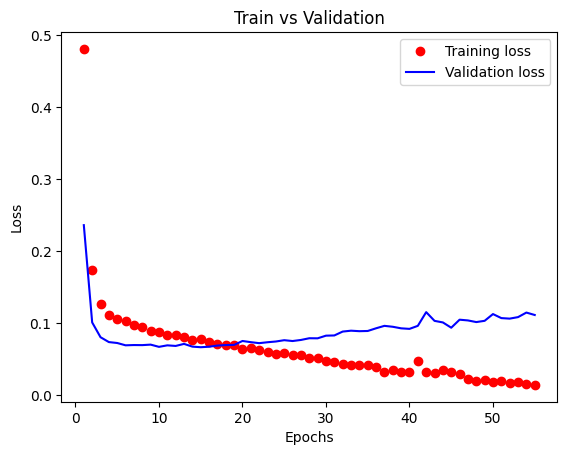

In [29]:
plt.plot(np.arange(1, epochs + 1), history['loss'], 'ro', label = "Training loss")
plt.plot(np.arange(1, epochs + 1), history['val_loss'], 'b', label = "Validation loss")
plt.title("Train vs Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

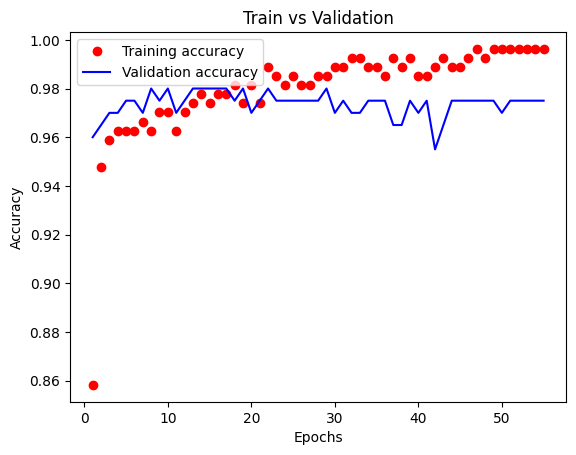

In [30]:
plt.plot(np.arange(1, epochs + 1), history['accuracy'], 'ro', label = "Training accuracy")
plt.plot(np.arange(1, epochs + 1), history['val_accuracy'], 'b', label = "Validation accuracy")
plt.title("Train vs Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

4 epochs is the optimal number of epochs

In [31]:
model = create_model()
model.fit(train_x, train_y, epochs=4, batch_size=1)
mse, mae = model.evaluate(test_x, test_y)
print(f"MSE = {mse}, MAE: {mae}")

Epoch 1/4
468/468 [==============================] - 3s 6ms/step - loss: 0.2797 - accuracy: 0.9509
Epoch 2/4
468/468 [==============================] - 3s 6ms/step - loss: 0.1087 - accuracy: 0.9658
Epoch 3/4
468/468 [==============================] - 3s 7ms/step - loss: 0.0916 - accuracy: 0.9637
Epoch 4/4
8/8 [==============================] - 0s 17ms/step - loss: 0.1101 - accuracy: 0.9567
MSE = 0.11008329689502716, MAE: 0.9567099809646606


## Regularization

In [33]:
def create_model():
  model = models.Sequential()
  model.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.001), activation='relu', input_shape=(9,)))
  model.add(layers.Dense(64, kernel_regularizer=regularizers.l1(0.001), activation='relu'))
  model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001), activation='relu'))
  model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001), activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))

  sgd = SGD(learning_rate=0.008)
  model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [34]:
model = create_model()
epochs = 55
reg_history = model.fit(xk_train, yk_train, epochs=epochs, batch_size=1, validation_data=(x_valid, y_valid))
reg_history = reg_history.history

Epoch 1/55
268/268 [==============================] - 3s 10ms/step - loss: 1.9465 - accuracy: 0.8396 - val_loss: 1.6695 - val_accuracy: 0.9750
Epoch 2/55
268/268 [==============================] - 3s 10ms/step - loss: 1.5838 - accuracy: 0.9552 - val_loss: 1.5004 - val_accuracy: 0.9700
Epoch 3/55
268/268 [==============================] - 3s 10ms/step - loss: 1.4988 - accuracy: 0.9664 - val_loss: 1.4441 - val_accuracy: 0.9800
Epoch 4/55
268/268 [==============================] - 2s 9ms/step - loss: 1.4503 - accuracy: 0.9627 - val_loss: 1.3991 - val_accuracy: 0.9750
Epoch 5/55
268/268 [==============================] - 2s 9ms/step - loss: 1.4077 - accuracy: 0.9627 - val_loss: 1.3577 - val_accuracy: 0.9800
Epoch 6/55
268/268 [==============================] - 2s 9ms/step - loss: 1.3675 - accuracy: 0.9627 - val_loss: 1.3208 - val_accuracy: 0.9750
Epoch 7/55
268/268 [==============================] - 2s 9ms/step - loss: 1.3284 - accuracy: 0.9664 - val_loss: 1.2842 - val_accuracy: 0.9800
Epo

In [35]:
mse, mae = model.evaluate(test_x, test_y)
print(f"MSE = {mse}, MAE: {mae}")

8/8 [==============================] - 0s 20ms/step - loss: 0.3222 - accuracy: 0.9394
MSE = 0.3222477436065674, MAE: 0.939393937587738


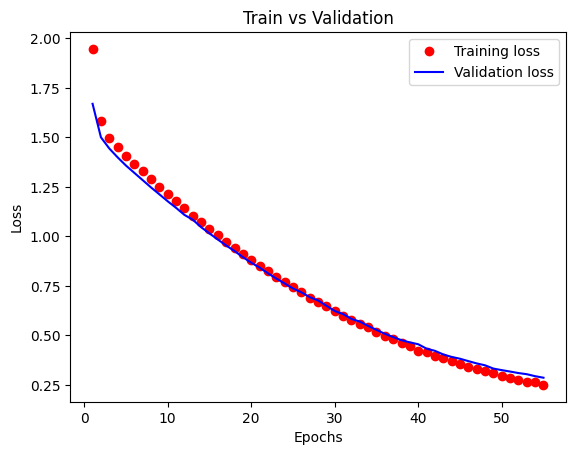

In [36]:
plt.plot(np.arange(1, epochs + 1), reg_history['loss'], 'ro', label = "Training loss")
plt.plot(np.arange(1, epochs + 1), reg_history['val_loss'], 'b', label = "Validation loss")
plt.title("Train vs Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

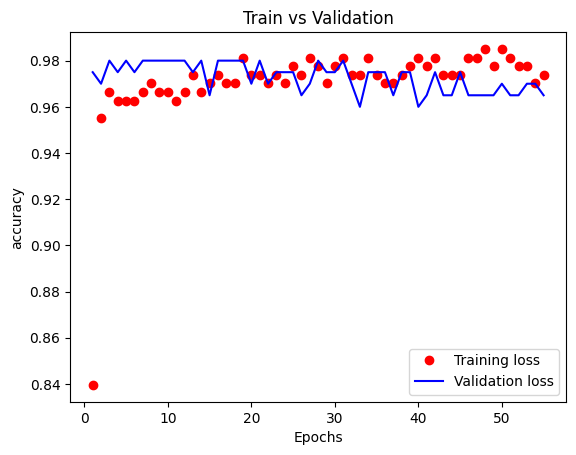

In [37]:
plt.plot(np.arange(1, epochs + 1), reg_history['accuracy'], 'ro', label = "Training loss")
plt.plot(np.arange(1, epochs + 1), reg_history['val_accuracy'], 'b', label = "Validation loss")
plt.title("Train vs Validation")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()